<a href="https://colab.research.google.com/github/SunRani/IDS/blob/main/problem2_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rani Son**

## **Part 2 Python**
## **A Statistical Analaysis of Nutrition**

## **Before starting, I want to import all of the Libraries I need for analysis**

In [19]:
import pandas as pd

In [20]:
import numpy as np

In [21]:
from tabulate import tabulate

In [22]:
from scipy import stats
import matplotlib.pyplot as plt

In [23]:
url = "https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv"
df = pd.read_csv(url, sep=",")

In [24]:
df

,food item,weight_in_grams,saturated_fat,cholesterol
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79
...,...,...,...,...
956,COFFEE; BREWED 6 FL OZ,180.00,0.0,0
957,TEA; BREWED 8 FL OZ,240.00,0.0,0
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.00,0.0,0
959,LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF,15.00,0.0,0


In [25]:
df.sort_values("saturated_fat", axis = 0, ascending = False,
                 inplace = True, na_position ='last')

In [26]:
df

,food item,weight_in_grams,saturated_fat,cholesterol
378,CHEESECAKE 1 CAKE,1110.0,119.9,2053
535,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609
581,CREME PIE 1 PIE,910.0,90.1,46
890,LARD 1 CUP,205.0,80.4,195
...,...,...,...,...
731,TOMATOES; RAW 1 TOMATO,123.0,0.0,0
730,RASPBERRIES; RAW 1 CUP,123.0,0.0,0
727,TOMATO JUICE; CANNED W/O SALT 1 CUP,244.0,0.0,0
726,TOMATO JUICE; CANNED WITH SALT1 CUP,244.0,0.0,0


## **The Five Food Items with the highest amount of Saturated fat are, Cheesecake, Vanillia Ice Cream, Yellowcake, Cremepie and Lard.**

## **Comparing food items base on their size can be problematic as you could be comparing a tbsp of butter to an entire cheesecake, which is not helpful.**

In [27]:
df['saturated_fat_per_gram'] = df['saturated_fat'] / df['weight_in_grams']

In [28]:
df.sort_values("saturated_fat_per_gram", axis = 0, ascending = False,
                 inplace = True, na_position ='last')

In [29]:
df

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
908,BUTTER; SALTED 1 TBSP,14.0,7.1,31,0.507143
909,BUTTER; UNSALTED 1 TBSP,14.0,7.1,31,0.507143
709,BUTTER; SALTED 1/2 CUP,113.0,57.1,247,0.505310
710,BUTTER; UNSALTED 1/2 CUP,113.0,57.1,247,0.505310
912,BUTTER; SALTED 1 PAT,5.0,2.5,11,0.500000
...,...,...,...,...,...
877,LIMEADE;CONCENTRATE;FRZN;UNDIL6 FL OZ,218.0,0.0,0,0.000000
879,ORANGE SODA 12 FL OZ,372.0,0.0,0,0.000000
880,COLA; DIET; ASPRTAME + SACCHRN12 FL OZ,355.0,0.0,0,0.000000
881,COLA; DIET; SACCHARIN ONLY 12 FL OZ,355.0,0.0,0,0.000000


## **The new top five foods ordered by Satured fat per gram are Butter Salted 1 TBSP, Butter Unsalted 1 TBSP, Butter Salted 1/2 Cup, Butter Unsalted 1/2 Cup and Butter Salted 1 Pat. The food with the most Saturated Fat Per Gram is Butter Salted 1 TBSP.**

In [30]:
df['saturated_fat_per_gram'] = stats.zscore(df.saturated_fat_per_gram, nan_policy='omit')

In [31]:
df_outliers = df.query('(saturated_fat_per_gram > 3 | saturated_fat_per_gram < -3)')['saturated_fat_per_gram']

In [32]:
df_outliers

908    7.110475
909    7.110475
709    7.082741
710    7.082741
912    7.002408
913    7.002408
899    5.373078
890    5.371375
920    4.732985
210    4.240676
492    4.204266
576    3.942889
448    3.938687
898    3.278227
907    3.223726
Name: saturated_fat_per_gram, dtype: float64

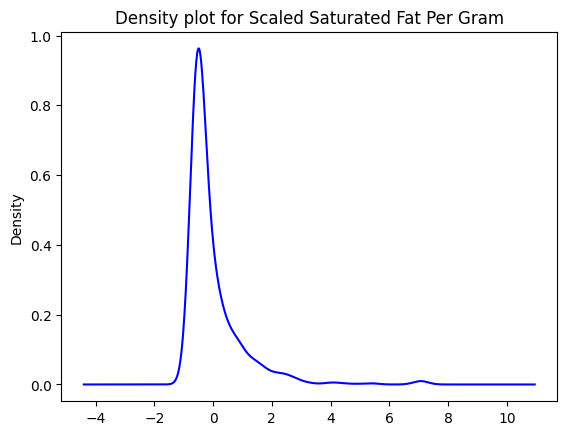

In [34]:
df.saturated_fat_per_gram.plot.density(color="blue")
plt.title('Density plot for Scaled Saturated Fat Per Gram')
plt.show()

In [35]:
df.weight_in_grams.isnull().sum()

0

In [36]:
df.saturated_fat.isnull().sum()

0

In [37]:
df.cholesterol.isnull().sum()

0

## **There does not appear to be any missing values so no imputation is needed.**

In [44]:
df['weight_in_grams'] = stats.zscore(df.weight_in_grams, nan_policy='omit')

In [45]:
df['saturated_fat'] = stats.zscore(df.saturated_fat, nan_policy='omit')

In [46]:
df['cholesterol'] = stats.zscore(df.cholesterol, nan_policy='omit')

In [47]:
df_outliers = df.query('(weight_in_grams > 3 | weight_in_grams < -3)')['weight_in_grams']

In [48]:
df_outliers

378    5.463557
535    5.907198
581    4.326016
458    5.452182
466    5.201923
410    5.446494
423    5.452182
422    7.886520
430    4.326016
406    3.569551
479    5.383929
361    4.326016
376    6.891171
386    3.842561
452    3.927876
539    4.525086
445    5.634188
579    4.525086
556    4.525086
433    5.110919
545    4.525086
696    7.920646
Name: weight_in_grams, dtype: float64

In [49]:
df_outliers = df.query('(saturated_fat > 3 | saturated_fat < -3)')['saturated_fat']

In [50]:
df_outliers

709     4.945855
710     4.945855
890     7.115564
907     4.405755
587     4.731677
588     3.930841
905     3.278997
901     3.027571
378    10.793826
384     4.470940
535    10.644833
581     8.018833
458     8.195762
466     6.268167
410     4.806174
423     4.079833
422     5.774628
430     3.185876
479     3.502486
376     4.061209
Name: saturated_fat, dtype: float64

In [51]:
df_outliers = df.query('(cholesterol > 3 | cholesterol < -3)')['cholesterol']

In [52]:
df_outliers

378    16.851355
384     8.902942
535     5.591799
458     4.807800
466     3.698526
410     4.716056
423     4.532567
422     9.595197
430     5.191459
351     4.357418
406     4.332397
479     5.032991
361     8.152305
376     5.066353
386     4.474184
452     6.876222
45      3.148058
Name: cholesterol, dtype: float64

## **In summary, when sorting by just the saturated fat, the 5 food items with the highest fat were Cheesecake, Vanillia Ice Cream, Yellowcake, Cremepie and Lard.**

## **After standardizing the Saturated Fat Per gram, I found that there were 15 outliers.**

## **Then, I determined that were were no missing values in all three of the numeric values.**

## **Lastly, For weight in grams there were 17 outliers,for saturated fat, there were 20 outliers and for cholesterol there were 17 outliers.**